# Practical work 2

## Excersice 1. Inverted indexing for collections of different sizes}

1. Reading and first preprocesing (cleaning non-meanigful information of the tags) of collections

In [24]:
## Read the files 
# Given a zip file with all the 

import gzip
import zipfile
import re
import time
import collections
import nltk

def extract_files(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        txt_files = []
        for zip_info in zip_ref.infolist():
            if zip_info.filename.endswith('.gz'):
                with zip_ref.open(zip_info) as gz_file:
                    with gzip.open(gz_file, 'rb') as gz_ref:
                        txt_content = gz_ref.read().decode('ASCII') 
                        txt_files.append(txt_content)
    return txt_files

zip_file_path = 'C:/Users/HP/Documents/07. EMSE/Master DSC/RI/TP Projet-20240919 (2)/TP Projet-20240919/Practice_02_data.zip'
files = extract_files(zip_file_path)

for file in files:

    temp = re.sub(r"(\s+)?+<doc><docno>\d+</docno>\s+", "", file)
    temp = re.sub(r"</doc>\s$","", re.sub(r"[\r\n]+", " ", temp))
    files[files.index(file)] = temp.split("</doc>")

files[0]


["Hercule Poirot 1000 243685651 2008-10-07T16:45:26Z Lightmouse 4469495 Hercule Poirot characters Fictional private investigators Hercule Poirot Series of books Infobox character Private Dectective    Former Retired Detective   Former Police  officer Curtain '' David Suchet Peter Ustinov Albert Finney See below Police Officer Agatha Christie Roman Catholic DEDEE2 Belgian Hercule Poirot Male The Mysterious Affair at Styles ''  Poirot  redirects here. For the TV series, see  Agatha Christie's Poirot . Hercule Poirot (pronounced  in  French ) is a  fictional  Belgian   detective created by  Agatha Christie . Along with  Miss Marple , Poirot is one of Christie's most famous and long-lived characters: he appeared in  33 novels and 51 short stories.    Poirot has been portrayed on screen, for films and TV, by various actors including  Albert Finney ,  Peter Ustinov ,  Ian Holm ,  Tony Randall ,  Alfred Molina , and  David Suchet . Overview Influences His name was derived from two other ficti

2. Generating inverted index using simple tokenization (provided by word_tokenize from NLTK library)

In [25]:
t_start = []
t_end = []

inverted_indexes = []

terms_quantity = []
average_term_length_per_doc = []
vocabulary_size = []

for file in files:
    t_start.append(time.time())
    termsQty =[]
    avg_term_length = []
    invertedIndex = collections.defaultdict(list)
    vocabSize = []
    for doc in file:
        docTemp = doc.split()
        termsQty.append(len(doc.split()))
        avg_term_length.append(len(doc)/termsQty[-1])
        tokens = set(nltk.word_tokenize(doc))
        vocabSize.append(len(tokens))
        for word in tokens:
            invertedIndex[word.lower()].append(file.index(doc))

    for k, v  in invertedIndex.items():
        invertedIndex[k] = [len(v), v]
    terms_quantity.append(termsQty)
    average_term_length_per_doc.append(avg_term_length)
    inverted_indexes.append(invertedIndex)
    vocabulary_size.append(vocabSize)
    t_end.append(time.time())

inverted_indexes[0]

defaultdict(list,
            {'final': [4, [0, 0, 7, 9]],
             'at': [10, [0, 0, 1, 2, 2, 5, 5, 7, 8, 9]],
             'it': [14, [0, 0, 2, 2, 3, 4, 5, 5, 7, 7, 8, 8, 9, 9]],
             'murder': [2, [0, 0]],
             'detective': [3, [0, 0, 1]],
             'career.10': [1, [0]],
             'farewell': [1, [0]],
             'investigates': [2, [0, 0]],
             'then': [3, [0, 0, 7]],
             'policemen': [1, [0]],
             'regularly': [1, [0]],
             'japan': [3, [0, 1, 7]],
             'created': [3, [0, 2, 7]],
             'represented': [2, [0, 2]],
             'post': [2, [0, 2]],
             'spade': [1, [0]],
             '3': [5, [0, 2, 7, 8, 9]],
             'slightly': [2, [0, 9]],
             'victorian': [1, [0]],
             'flashes': [1, [0]],
             'stamp': [1, [0]],
             'jose': [1, [0]],
             'westmacott': [1, [0]],
             'world': [8, [0, 0, 2, 2, 3, 3, 5, 7]],
             'siblings': [1, 

In [26]:
t_total = []

for i in range(len(t_start)):
    t_total.append(t_end[i] - t_start[i])

t_total

[0.5635030269622803,
 0.20472264289855957,
 0.5644192695617676,
 0.3752927780151367,
 1.416654348373413,
 2.1900739669799805,
 3.037665367126465,
 6.074788331985474,
 41.7619845867157]

3. Adding new stats and ploting:
* average documents length (#terms),
* average terms length (#char),
* vocabulary size (#distinct terms in the whole collection),

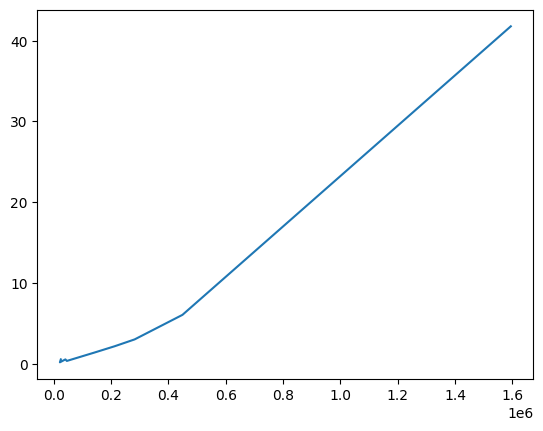

In [27]:
# First graph, time-efficiency: for each of the 9 collections show the number of words per collection (sum
# over documents) and the time it took the simple indexing

import matplotlib as mpl
import matplotlib.pyplot as plt

words_per_collection = [sum(element) for element in terms_quantity]

plt.plot(words_per_collection,t_total)


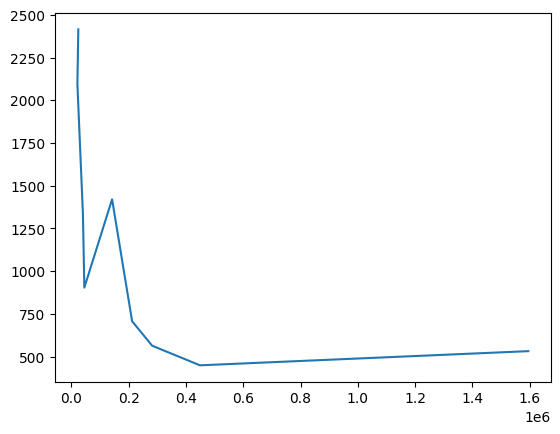

In [28]:
# Second Graph average document length per collection:

average_terms_per_doc = [sum(element)/len(element) for element in terms_quantity]

plt.plot(words_per_collection, average_terms_per_doc)


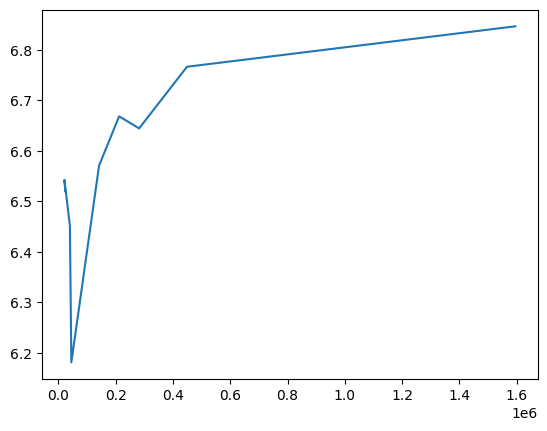

In [29]:
# Third Graph average term length per collection: 
average_doc_length =[sum(element)/len(element) for element in average_term_length_per_doc]
plt.plot(words_per_collection, average_doc_length)


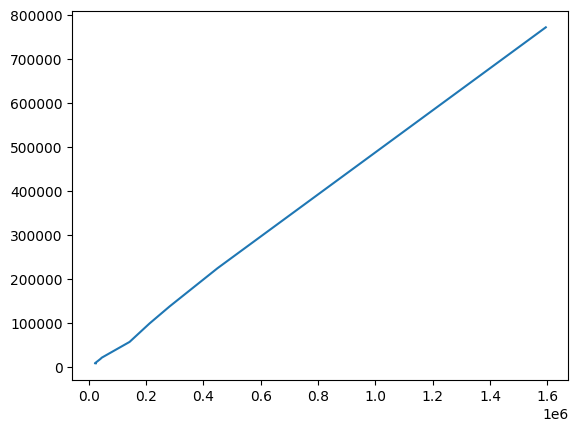

In [30]:
# Fourth graph: Vocabulary size per collection

collection_vocabulary_size = [sum(element) for element in vocabulary_size]
plt.plot(words_per_collection, collection_vocabulary_size)

## Excecise 2 . Stop words



In [35]:
def import_stop_words(zip_file_path):
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        for file in zip_ref.namelist():
            if file.endswith('.txt'):
                with zip_ref.open(file, 'r') as f:
                    txt_content = f.read().decode('utf-8')
                    if txt_content.startswith('\ufeff'):
                        txt_content = txt_content[1:]
                    txt_content = txt_content.splitlines()
                    return txt_content


zip_file_path = 'C:/Users/HP/Documents/07. EMSE/Master DSC/RI/TP Projet-20240919 (2)/TP Projet-20240919/Practice_02_data.zip'
stop_words = import_stop_words(zip_file_path)
stop_words

['a',
 'able',
 'about',
 'above',
 'abst',
 'accordance',
 'according',
 'accordingly',
 'across',
 'act',
 'actually',
 'added',
 'adj',
 'adopted',
 'affected',
 'affecting',
 'affects',
 'after',
 'afterwards',
 'again',
 'against',
 'ah',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'announce',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anymore',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apparently',
 'approximately',
 'are',
 'aren',
 'arent',
 'arise',
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'at',
 'auth',
 'available',
 'away',
 'awfully',
 'b',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'begin',
 'beginning',
 'beginnings',
 'begins',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'biol',
 'both',
 'brief',
 'briefly',
 'but',
 'by',
 'c',
 'ca',
 'came',


In [36]:
def generate_inverted_index_stop_words(files, stop_words):
    # The respose is a list containing:
    ## inverted_indexes:
    ## terms_quantity
    ## average_term_length_per_doc
    ## vocabulary_size
    ## total_time
    t_start = []
    t_end = []
    t_total =[]
    stop = set(stop_words)

    inverted_indexes = []

    terms_quantity = []
    average_term_length_per_doc = []
    vocabulary_size = []

    response =[]

    for file in files:
        t_start.append(time.time())
        termsQty =[]
        avg_term_length = []
        invertedIndex = collections.defaultdict(list)
        vocabSize = []
        for doc in file:
            docTemp = doc.split()
            termsQty.append(len(doc.split()))
            avg_term_length.append(len(doc)/termsQty[-1])
            tokens = set(nltk.word_tokenize(doc)) - stop
            vocabSize.append(len(tokens))
            for word in tokens:
                invertedIndex[word.lower()].append(file.index(doc))

        for k, v  in invertedIndex.items():
            invertedIndex[k] = [len(v), v]
        terms_quantity.append(termsQty)
        average_term_length_per_doc.append(avg_term_length)
        inverted_indexes.append(invertedIndex)
        vocabulary_size.append(vocabSize)
        t_end.append(time.time())

    for i in range(len(t_start)):
        t_total.append(t_end[i] - t_start[i])

    response.append(inverted_indexes)
    response.append(terms_quantity)
    response.append(average_term_length_per_doc)
    response.append(vocabulary_size)
    response.append(t_total)

    return response

In [79]:
def generate_inverted_index_porter(files, stop_words=[], use_porter=False):
    # The respose is a list containing:
    ## inverted_indexes:
    ## terms_quantity
    ## average_term_length_per_doc
    ## vocabulary_size
    ## total_time
    t_start = []
    t_end = []
    t_total =[]
    stop = set(stop_words)

    inverted_indexes = []

    terms_quantity = []
    average_term_length_per_doc = []
    vocabulary_size = []

    if use_porter:
        steemer = nltk.PorterStemmer()
    response =[]

    for file in files:
        t_start.append(time.time())
        termsQty =[]
        avg_term_length = []
        invertedIndex = collections.defaultdict(list)
        vocabSize = []
        for doc in file:
            docTemp = doc.split()
            termsQty.append(len(doc.split()))
            avg_term_length.append(len(doc)/termsQty[-1])
            tokens = nltk.word_tokenize(doc)
            tokens = set(tokens)
            tokens = tokens - stop
            if use_porter:
                tokens = set([steemer.stem(token) for token in tokens])
            vocabSize.append(len(tokens))
            for word in tokens:
                invertedIndex[word.lower()].append(file.index(doc))

        for k, v  in invertedIndex.items():
            invertedIndex[k] = [len(v), v]
        terms_quantity.append(termsQty)
        average_term_length_per_doc.append(avg_term_length)
        inverted_indexes.append(invertedIndex)
        vocabulary_size.append(vocabSize)
        t_end.append(time.time())

    for i in range(len(t_start)):
        t_total.append(t_end[i] - t_start[i])

    response.append(inverted_indexes)
    response.append(terms_quantity)
    response.append(average_term_length_per_doc)
    response.append(vocabulary_size)
    response.append(t_total)

    return response

In [58]:
basic_indexation = generate_inverted_index_porter(files)
stop_word_indexation = generate_inverted_index_porter(files, stop_words=stop_words)
steemed_indexation = generate_inverted_index_porter(files, use_porter=True)
stop_word_and_steemed_indexation = generate_inverted_index_porter(files, stop_words, True)

In [68]:
indexated_Funtions = []
indexated_Funtions.append(basic_indexation)
indexated_Funtions.append(stop_word_indexation)
indexated_Funtions.append(steemed_indexation)
indexated_Funtions.append(stop_word_and_steemed_indexation)
basic_indexation[1] == stop_word_indexation[1] == steemed_indexation[1] == stop_word_and_steemed_indexation[1]

True

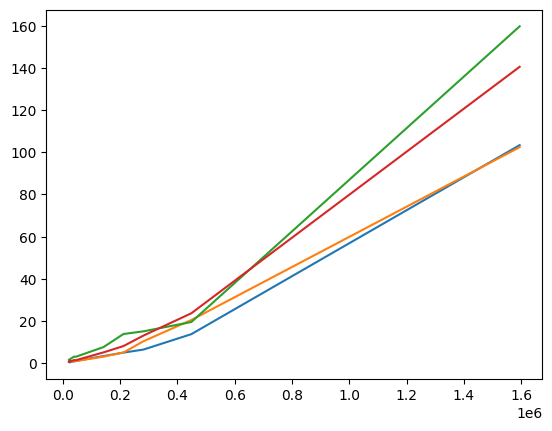

In [66]:
words_per_collection = [sum(element) for element in basic_indexation[1]]
plt.plot(words_per_collection, basic_indexation[4])
plt.plot(words_per_collection, stop_word_indexation[4])
plt.plot(words_per_collection, steemed_indexation[4])
plt.plot(words_per_collection, stop_word_and_steemed_indexation[4])

In [72]:
indexated_Funtions[1][1] == indexated_Funtions[0][1]

True

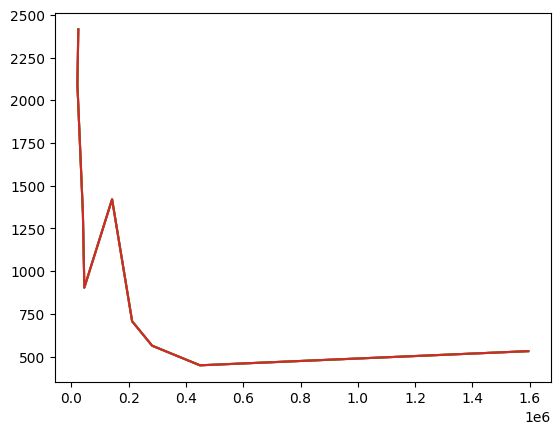

In [75]:
avg_Plot = []
for element in indexated_Funtions:
    avg_Plot.append([sum(subelement)/len(subelement) for subelement in element[1]])

plt.plot(words_per_collection, avg_Plot[0])
plt.plot(words_per_collection, avg_Plot[1])
plt.plot(words_per_collection, avg_Plot[2])
plt.plot(words_per_collection, avg_Plot[3])


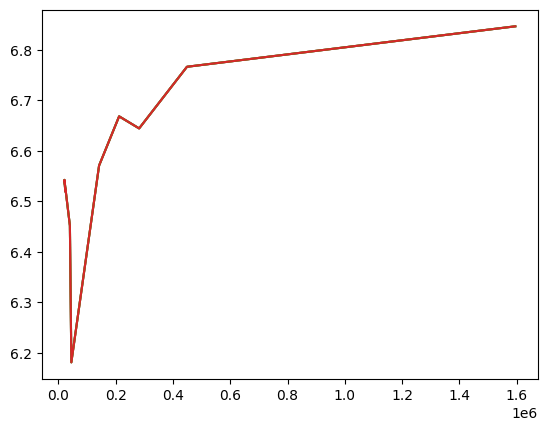

In [76]:
# Third Graph average term length per collection: 
doc_length = []
for element in indexated_Funtions:
    doc_length.append([sum(subelement)/len(subelement) for subelement in element[2]])
    
                         
plt.plot(words_per_collection, doc_length[0])
plt.plot(words_per_collection, doc_length[1])
plt.plot(words_per_collection, doc_length[2])
plt.plot(words_per_collection, doc_length[3])

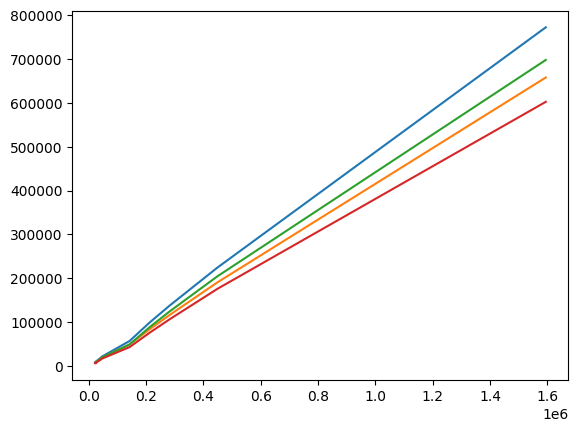

In [78]:
collection_vocabulary_size = []
for element in indexated_Funtions:
    collection_vocabulary_size.append( [sum(subelement) for subelement in element[3]])

plt.plot(words_per_collection, collection_vocabulary_size[0])
plt.plot(words_per_collection, collection_vocabulary_size[1])
plt.plot(words_per_collection, collection_vocabulary_size[2])
plt.plot(words_per_collection, collection_vocabulary_size[3])